# "Experiments with activation functions and weights initialization"
> "Investigate the distributions of activations throught layers with different activation functions and weights initialization"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Peiyi Hung
- categories: [category, learning]
- image:"images/tanh.png"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid

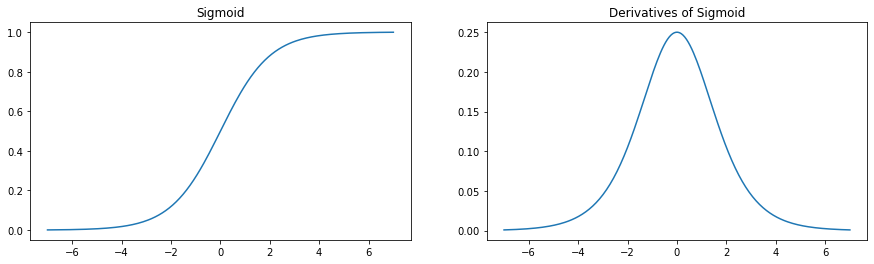

In [27]:
#collapse-hide
x = np.linspace(-7, 7, 200)
y = 1 / (1+np.exp(-x))
derivative = y * (1-y)

fig, axes = plt.subplots(ncols=2, figsize=(15, 4))

axes[0].plot(x, y)
axes[0].set_title("Sigmoid")
axes[1].plot(x, derivative)
axes[1].set_title("Derivatives of Sigmoid");

In [1]:
def experiment(weights_multipler, act_func, lim, ticks):
    
    # model
    n_layers = 7
    hidden_size = 4096
    batch_size = 16
    dims = [hidden_size] * n_layers

    x = np.random.randn(batch_size, dims[0])

    activations = []
    for Din, Dout in zip(dims[:-1], dims[1:]):
        W = weights_multipler * np.random.randn(Din, Dout)
        x = act_func(x.dot(W))
        activations.append(x)
    
    
    # plot
    fig, axes = plt.subplots(ncols=n_layers-1, figsize=(25, 4))

    for i, ax in enumerate(axes):
        acts = activations[i].reshape(-1)
        ax.hist(acts, bins=80)
        ax.set_xlim(*lim)
        ax.set_xticks(ticks)
        title = f"""
        Layer {i+1}
        mean={acts.mean():.2f},
        std={acts.std():.2f}
                    """

        ax.set_title(title)

    plt.tight_layout()

In [4]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

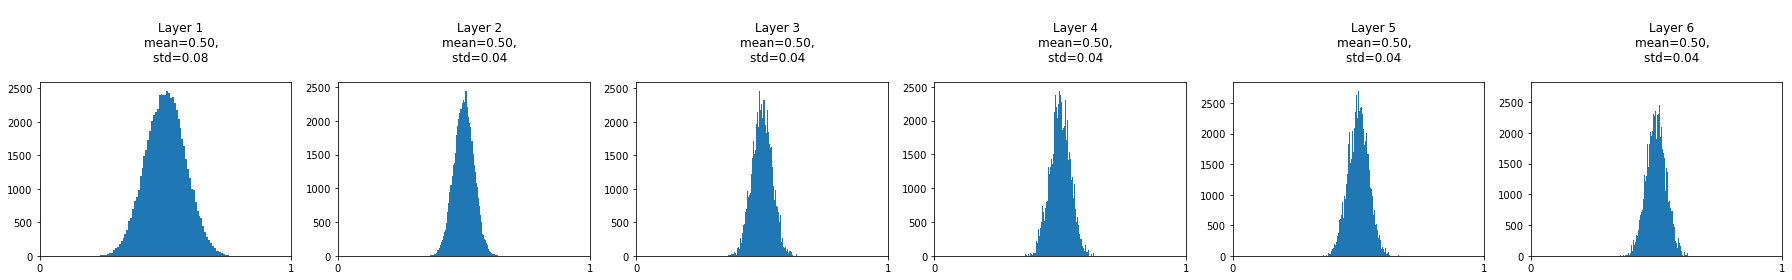

In [31]:
experiment(0.005, sigmoid, (0,1), (0,1))

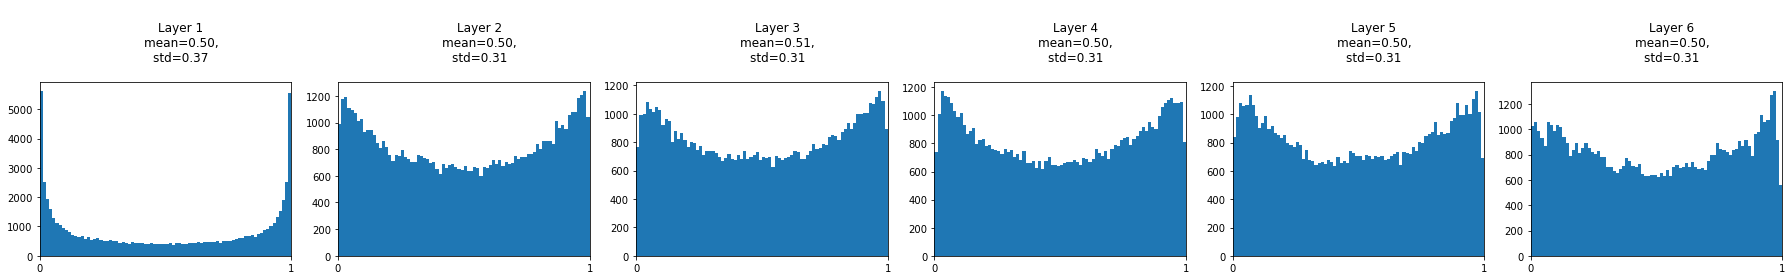

In [29]:
experiment(0.05, sigmoid, (0,1), (0,1))

# Tanh

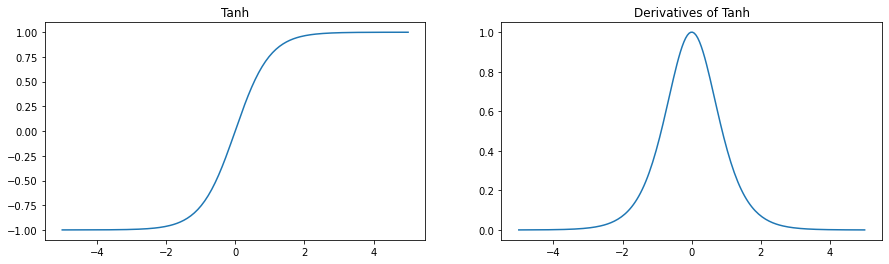

In [25]:
#collapse-hide
x = np.linspace(-5, 5, 200)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
derivative = 1 - y**2

fig, axes = plt.subplots(ncols=2, figsize=(15, 4))

axes[0].plot(x, y)
axes[0].set_title("Tanh")
axes[1].plot(x, derivative)
axes[1].set_title("Derivatives of Tanh");

weights is too small, all zero, not learning

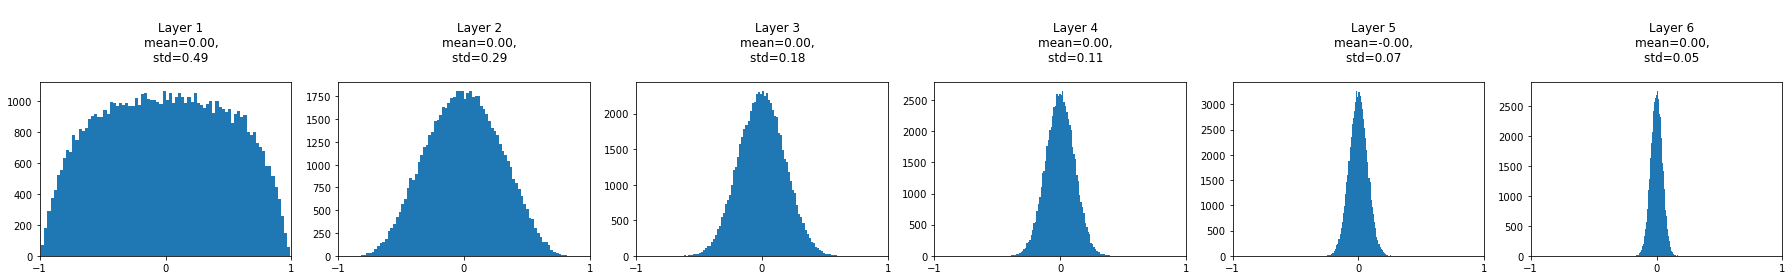

In [12]:
experiment(0.01, np.tanh, (-1,1), (-1, 0, 1))

weights is too big

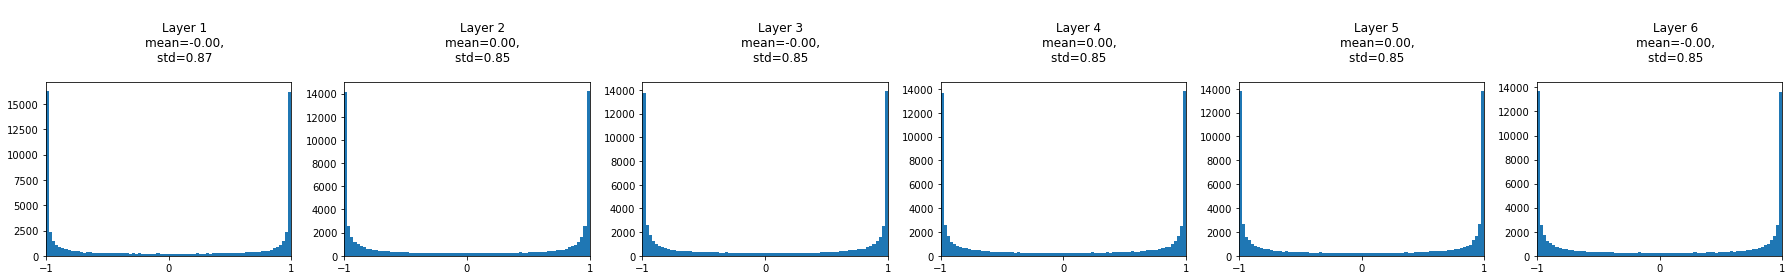

In [14]:
experiment(0.05, np.tanh, (-1,1), (-1, 0, 1))

**Xavier initialization**

**Core idea**: variance of input = variance of output

$$y=Wx,\quad y_i = \displaystyle\sum_{j=1}^{Din}x_jw_{ij}$$

where $y_i$ is the ith element of $y$, $x_j$ is the jth element of $x$, and $w_{ij}$ is the element in ith row, jth col of $W$.

Assuming that $x,W$ are iid and zero-mean, then we got:

$$
\begin{split}
    \text{Var}(y_i) &  =  D_{in} \times \text{Var}(x_jw_{ij})  \\
                    &  =  D_{in} \times \text{Var}(x_j) \times \text{Var}(w_ij)
\end{split}
$$

If $\text{Var}(w_{ij}) = \frac{1}{D_{in}}$, then $\text{Var}(y_i) = \text{Var}(x_j)$. We set $\text{std}(w) = \frac{1}{\sqrt{D_{in}}}$

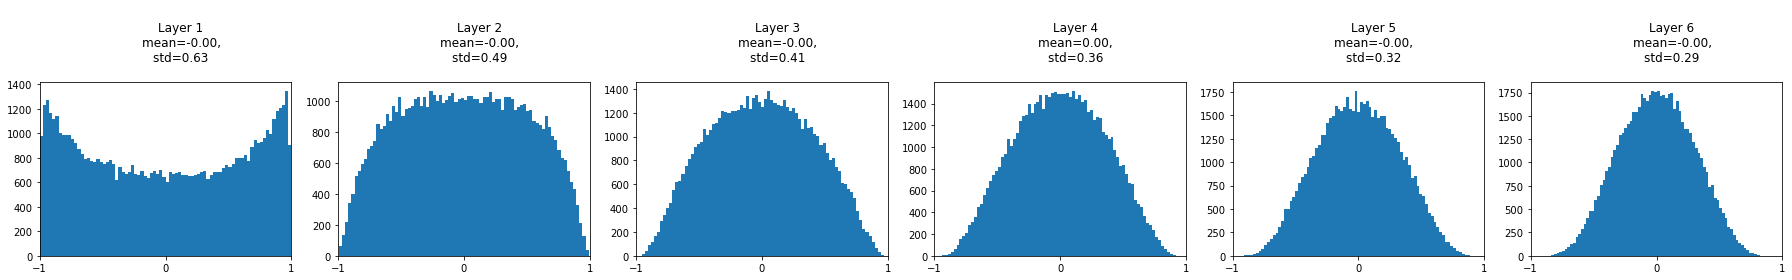

In [16]:
experiment(1/np.sqrt(4096), np.tanh, (-1,1), (-1, 0, 1))

# ReLU

In [19]:
def relu(x):
    return np.clip(x, 0, None)

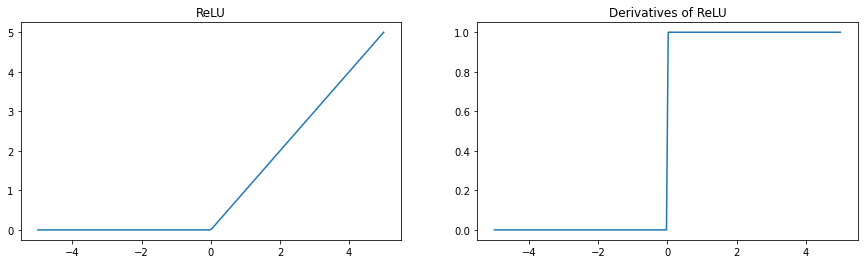

In [28]:
#collapse-hide
x = np.linspace(-5, 5, 200)
y = relu(x)
derivative = y > 0

fig, axes = plt.subplots(ncols=2, figsize=(15, 4))

axes[0].plot(x, y)
axes[0].set_title("ReLU")
axes[1].plot(x, derivative)
axes[1].set_title("Derivatives of ReLU");

most activations are "dead"

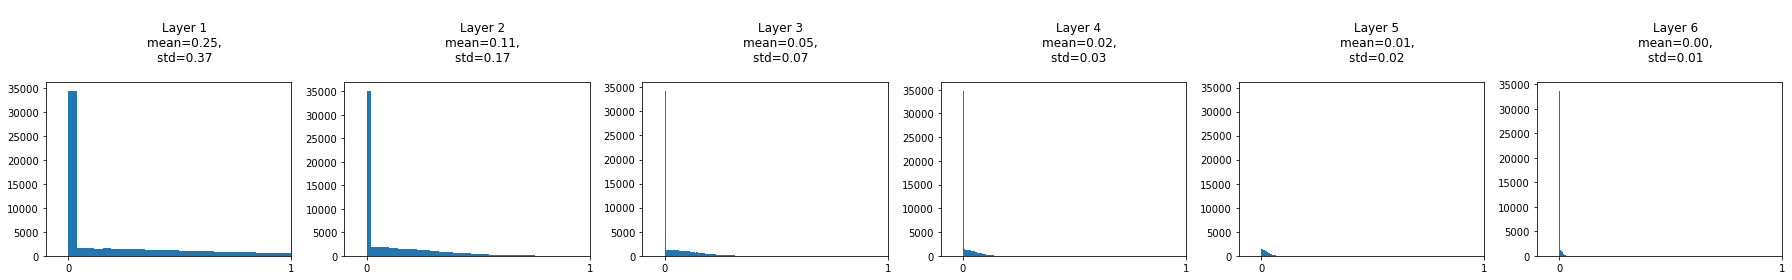

In [18]:
experiment(0.01, relu, (-0.1, 1), (0, 1))

huge activation, huge gradient

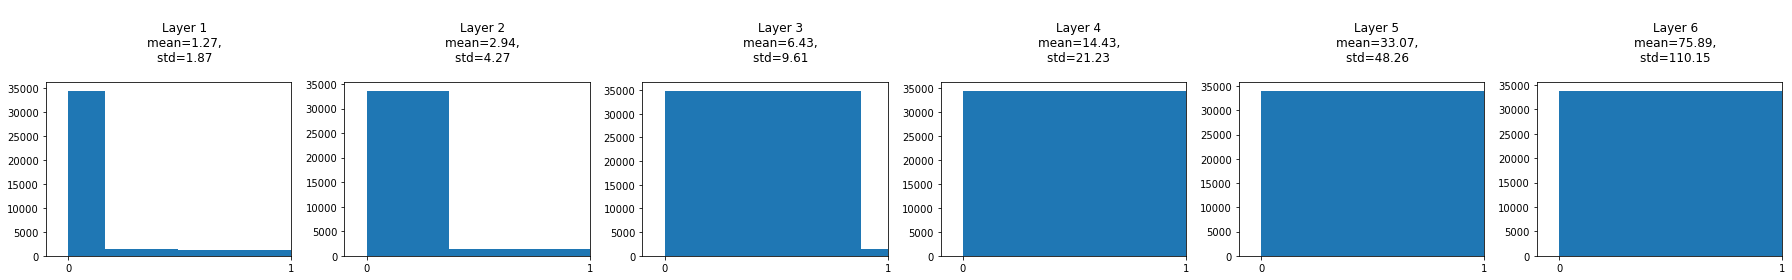

In [20]:
experiment(0.05, relu, (-0.1, 1), (0, 1))

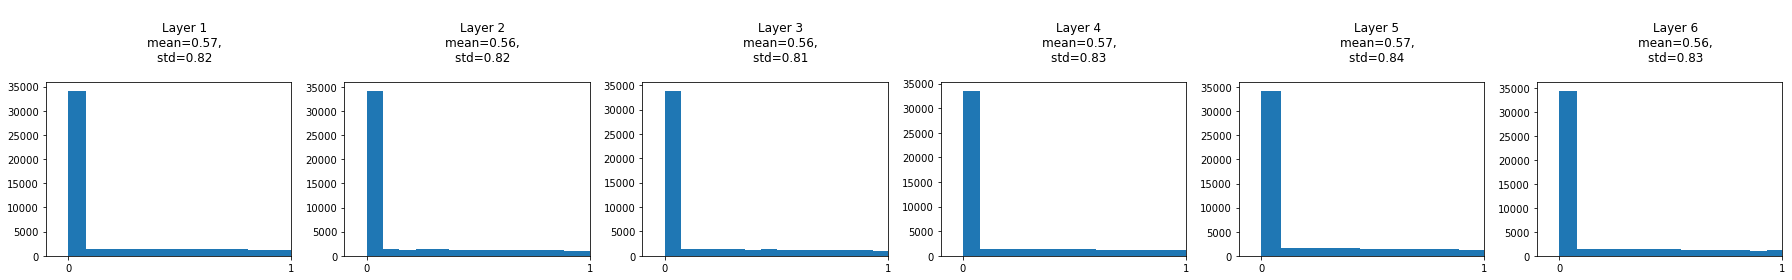

In [22]:
experiment(np.sqrt(2/4096), relu, (-0.1, 1), (0, 1))